# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

## Overview of the Dataset
The dataset contains **41,188 instances** and **21 attributes (variables).**

It is focused on **predicting whether a customer will subscribe to a term deposit** based on various factors.

The primary marketing strategy was **phone-based direct marketing.**

## Marketing Campaigns Represented
The dataset includes **two marketing campaigns:**

- **Older campaign:** Data collected from a previous phone-based marketing effort.
- **Main campaign (2008–2013):** Focused on promoting term deposits.

Most analyses focus on the **second campaign (2008–2013),** as it contains detailed customer interaction records.

## Dataset Attributes
The dataset includes **three main types of attributes:**

### **A. Client-related Attributes**
These describe customer demographics and financial status:

- **age:** Age of the client.
- **job:** Type of job (e.g., "admin", "technician", "blue-collar").
- **marital:** Marital status (e.g., "married", "single").
- **education:** Education level.
- **default:** Has credit in default? ("yes", "no").
- **housing:** Has a housing loan? ("yes", "no").
- **loan:** Has a personal loan? ("yes", "no").

### **B. Campaign-related Attributes**
These describe details about the marketing calls:

- **contact:** Type of contact (cellular or telephone).
- **month:** Last contact month.
- **day_of_week:** Last contact day.
- **duration:** Duration of the last call (in seconds).
- **campaign:** Number of times contacted during the campaign.

### **C. Socioeconomic Indicators**
These describe external factors affecting customer behavior:

- **emp.var.rate:** Employment variation rate.
- **cons.price.idx:** Consumer price index.
- **cons.conf.idx:** Consumer confidence index.
- **euribor3m:** 3-month Euribor rate.
- **nr.employed:** Number of employees.

### **D. Outcome Variable**
- **y:** Target variable (whether the client subscribed to a term deposit, "yes" or "no").


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning models and preprocessing
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Time utility
import time

# For inline plotting in Jupyter notebooks
%matplotlib inline


**Read the csv file**

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



**Generating descriptive statistics**

In [5]:
# Set display option for floating-point numbers to show two decimal places
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.00,41188.00,41188.00,41188,41188.00,41188.00,41188.00,41188.00,41188.00,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.57,962.48,0.17,NaN,0.08,93.58,-40.50,3.62,5167.04,NaN
std,10.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.77,186.91,0.49,NaN,1.57,0.58,4.63,1.73,72.25,NaN
min,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,0.00,0.00,NaN,-3.40,92.20,-50.80,0.63,4963.60,NaN
25%,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,999.00,0.00,NaN,-1.80,93.08,-42.70,1.34,5099.10,NaN
50%,38.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.00,999.00,0.00,NaN,1.10,93.75,-41.80,4.86,5191.00,NaN
75%,47.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.00,999.00,0.00,NaN,1.40,93.99,-36.40,4.96,5228.10,NaN


# Initial Data Understanding

In this section, we perform an initial exploration of the dataset to understand its structure, quality, and basic statistics. This will allow us to identify any potential issues and provide insights that guide further data preparation and modeling.

### Dataset Overview

The dataset contains **41,188 rows** and **21 columns**, with features related to customer information and their interaction with a marketing campaign. The target variable is whether the customer subscribed to a term deposit (denoted by **`y`**).

### Key Takeaways from Descriptive Statistics:

1. **General Overview**:
   - **Shape of the DataFrame**: The dataset consists of **41,188 rows** and **21 columns**, representing a mixture of numerical and categorical attributes.
   
2. **Column Insights**:
   - **`age`**: The **age** column contains numerical values representing the age of the customers. There are **468 outliers** with values outside the expected range (9.5 to 69.5), which need to be capped or removed.
   - **`job`**: This categorical feature describes the job of the customer. There is a rare category **"unknown"**, which should be grouped into a single category or removed.
   - **`marital`**: This categorical feature describes the marital status of the customer. Similar to the `job` column, there is a rare category **"unknown"** that requires adjustment.
   - **`education`**: Customers' education level is captured here. The category **"illiterate"** is rare and should be addressed (grouped or removed).
   - **`default`**: This feature indicates whether the customer has credit in default. The category **"yes"** is rare and can be grouped.
   - **`housing`** and **`loan`**: These columns indicate whether the customer has housing or loan-related commitments. No issues identified here.
   - **`contact`**: The communication type used to contact the customer. This feature appears to be in good shape.
   - **`month`**: The month of the last contact. The rare category **"dec"** should be grouped or removed.
   - **`day_of_week`**: The weekday of the last contact, which does not appear to have any issues.
   - **`duration`**: Duration of the last contact. This column contains **2,963 outliers** that should be addressed by capping or removal.
   - **`campaign`**: Number of contacts performed during the campaign. This column has **2,406 outliers** that should be addressed.
   - **`pdays`**: This column contains values indicating the number of days since the customer was last contacted. It has **1,515 outliers** with values equal to 999, likely representing missing or undefined values.
   - **`previous`**: Number of contacts performed before this campaign. It has **5,625 outliers** with values of 0, which could represent no previous contact.
   - **`poutcome`**: Outcome of the previous marketing campaign. No issues identified.
   - **`emp.var.rate`**, **`cons.price.idx`**, **`cons.conf.idx`**, **`euribor3m`**, and **`nr.employed`**: These are economic indicators. There are high correlations between **`emp.var.rate`**, **`euribor3m`**, and **`nr.employed`**, suggesting that one of these columns may be dropped to avoid multicollinearity.
   - **`y`**: The target variable, indicating whether the customer subscribed to the term deposit.

3. **Statistical Summary**:
   - **Age**:
     - Min: **17** years (some outliers outside expected bounds)
     - Max: **98** years
     - The age column shows significant outliers that need to be addressed.
   - **Duration**:
     - Min: **0** minutes
     - Max: **4918** minutes
     - This column shows extreme outliers that need to be capped or handled.
   - **Campaign**:
     - Min: **1** contact
     - Max: **56** contacts
     - Several outliers above the expected range (6 contacts).
   - **Previous**:
     - Min: **0** contacts
     - Max: **7** contacts
     - Outliers where values equal to 0 should be examined as they may represent no prior contact.
   - **Economic Features**:
     - **emp.var.rate** ranges from **-3.4** to **1.4**, and **euribor3m** ranges from **0.634** to **5.045**.
     - There is a **high correlation** between **emp.var.rate**, **euribor3m**, and **nr.employed**, suggesting the potential to drop one of these features due to multicollinearity.

4. **Potential Data Issues**:
   - **Outliers**: Multiple columns (e.g., **age**, **duration**, **campaign**, **previous**) contain significant outliers that could impact model performance and should be addressed.
   - **Rare Categories**: Features such as **job**, **marital**, **education**, and **month** contain rare categories that should be grouped or removed.
   - **High Feature Correlation**: **emp.var.rate**, **euribor3m**, and **nr.employed** show high correlation and may need to be reduced to avoid multicollinearity.
   - **Duplicates**: The dataset contains **12 duplicate rows**, which should be removed to prevent bias and improve model quality.

5. **Next Steps**:
   - **Data Cleaning**: Handle missing values, remove or cap outliers, and adjust rare categories.
   - **Feature Engineering**: Consider transforming or creating new features to improve model performance.
   - **Correlation Handling**: Drop one of the highly correlated features (**emp.var.rate**, **euribor3m**, or **nr.employed**) to prevent multicollinearity.
   - **Data Exploration**: Further analyze the relationships between features and the target variable (**y**).

---

This overview provides a foundation for cleaning, transforming, and preparing the dataset for further analysis or modeling.


Data Cleaning Step -1 Check for Missing Values & duplicates

In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display missing values and percentage
print("Missing values:\n", missing_values)
print("Missing percentage:\n", missing_percentage)

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Duplicate rows:\n{duplicate_rows}")

# Drop duplicate rows
df = df.drop_duplicates()

# Check the shape of the dataframe after dropping duplicates
print(f"Shape of the dataframe after dropping duplicates: {df.shape}")


Missing values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
Missing percentage:
 age              0.00
job              0.00
marital          0.00
education        0.00
default          0.00
housing          0.00
loan             0.00
contact          0.00
month            0.00
day_of_week      0.00
duration         0.00
campaign         0.00
pdays            0.00
previous         0.00
poutcome         0.00
emp.var.rate     0.00
cons.price.idx   0.00
cons.conf.idx    0.00
euribor3m        0.00
nr.employed      0.00
y                0.00
dtype: float64
Duplicate rows:
       age          job   marital   

Data Cleaning Step 2: Handle Outliers

For handling outliers, we can use the Interquartile Range (IQR) method to identify outliers and cap them

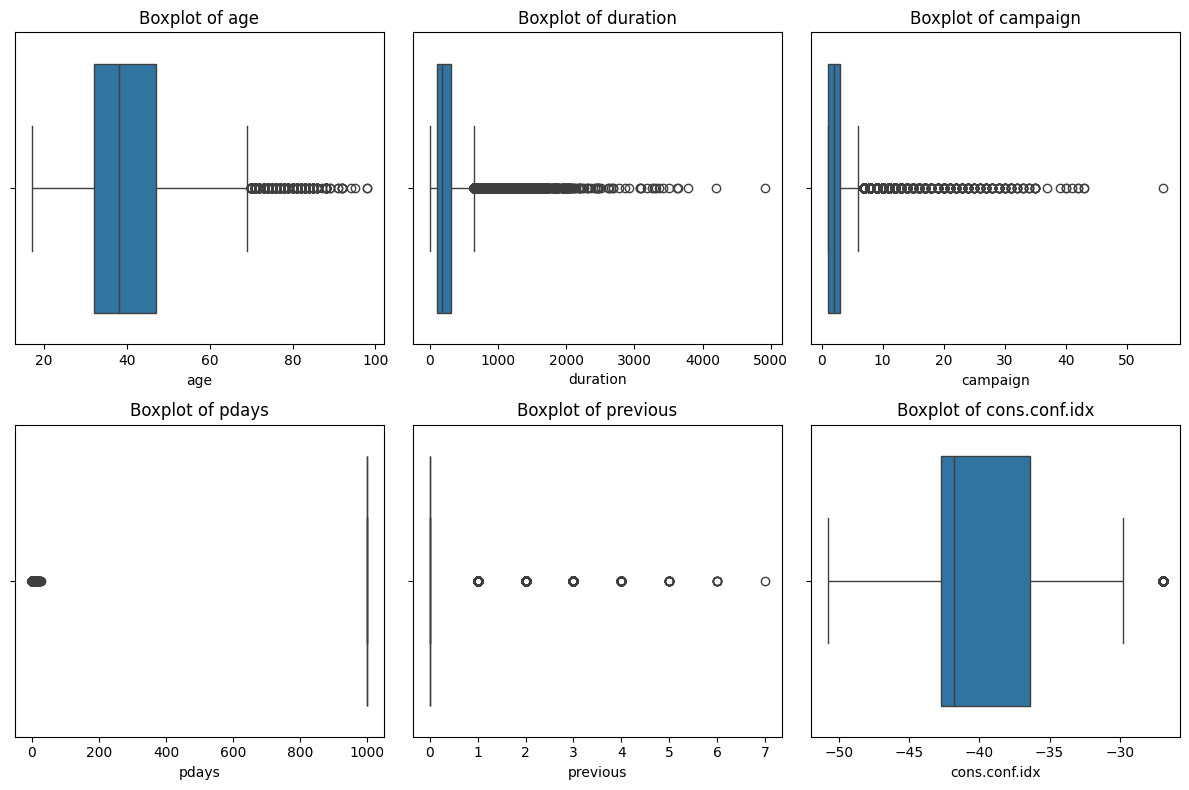

In [7]:
# Columns with outliers
outlier_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx']

# Set up the plot
plt.figure(figsize=(12, 8))

# Create boxplots for each column with outliers
for i, column in enumerate(outlier_columns, 1):
    plt.subplot(2, 3, i)  # Create a subplot for each boxplot
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()  # Adjust layout for better visual display
plt.show()


The following code defines a function `handle_outliers_iqr` that handles outliers in specified columns using the Interquartile Range (IQR) method. It calculates the lower and upper bounds based on the IQR and caps any values that fall outside these bounds to the nearest boundary.

In [8]:
def handle_outliers_iqr(df, columns_to_check):
    for column in columns_to_check:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers (replace outliers with boundary values)
        df[column] = df[column].clip(lower_bound, upper_bound)

    return df

# Example usage: Cap outliers for 'age', 'duration', 'campaign', etc.
columns_to_check = ['age', 'duration', 'campaign', 'previous', 'cons.conf.idx']
df = handle_outliers_iqr(df, columns_to_check)



Data Cleaning Step 3: Handling Rare Categories in Categorical Columns

For categorical columns with rare values like job, education, month, etc., let's group them into an "Other" category:

In [9]:
# Define rare categories for each column
rare_categories = {
    'job': ['unknown'],         # Rare category in 'job'
    'marital': ['unknown'],     # Rare category in 'marital'
    'education': ['unknown', 'illiterate'],  # Rare categories in 'education'
    'default': ['unknown']          
   
}

# Function to replace rare categories with 'other'
def handle_rare_categories(df, column, rare_values):
    df[column] = df[column].replace(rare_values, 'other')
    return df

# Apply the function to the relevant columns
for column, rare_values in rare_categories.items():
    if rare_values:  # Only apply if there are rare values to handle
        df = handle_rare_categories(df, column, rare_values)

# Verify the changes
print("Unique values in 'job' after handling rare categories:", df['job'].unique())
print("Unique values in 'marital' after handling rare categories:", df['marital'].unique())
print("Unique values in 'education' after handling rare categories:", df['education'].unique())
print("Unique values in 'month' after handling rare categories:", df['month'].unique())



Unique values in 'job' after handling rare categories: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'other' 'entrepreneur'
 'student']
Unique values in 'marital' after handling rare categories: ['married' 'single' 'divorced' 'other']
Unique values in 'education' after handling rare categories: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'other' 'university.degree']
Unique values in 'month' after handling rare categories: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


Data Cleaning Step 4: Drop or Impute Missing Values (if any)

If you have missing values in certain columns, decide whether to drop the rows or columns, or to impute the missing values. Here's how to impute missing values with the median for numerical columns and the mode for categorical columns:

In [10]:
# Impute missing values for numerical columns with median
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Impute missing values for categorical columns with mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


Data Cleaning Step 6 - Dropping previous Column

Since the previous column contains zero-variance values, it doesn’t provide any useful information for modeling, so we’ll drop it.

In [11]:
df = df.drop(columns=['previous', 'pdays'])

Data Cleaning Step 7 - Handling High Correlation:
We’ll remove one of the correlated columns: emp.var.rate, euribor3m, and nr.employed. For simplicity, let's drop emp.var.rate and nr.employed here.

In [12]:
df = df.drop(columns=['emp.var.rate', 'nr.employed'])


Data Cleaning Step 5 - Final check 

The code generates several visualizations to explore the dataset: histograms with KDE for continuous features, count plots for categorical features, a heatmap to visualize missing values, and a correlation heatmap for numerical variables. These plots help to understand the data distribution, detect missing values, and examine relationships between continuous variables, providing valuable insights for further analysis or modeling.

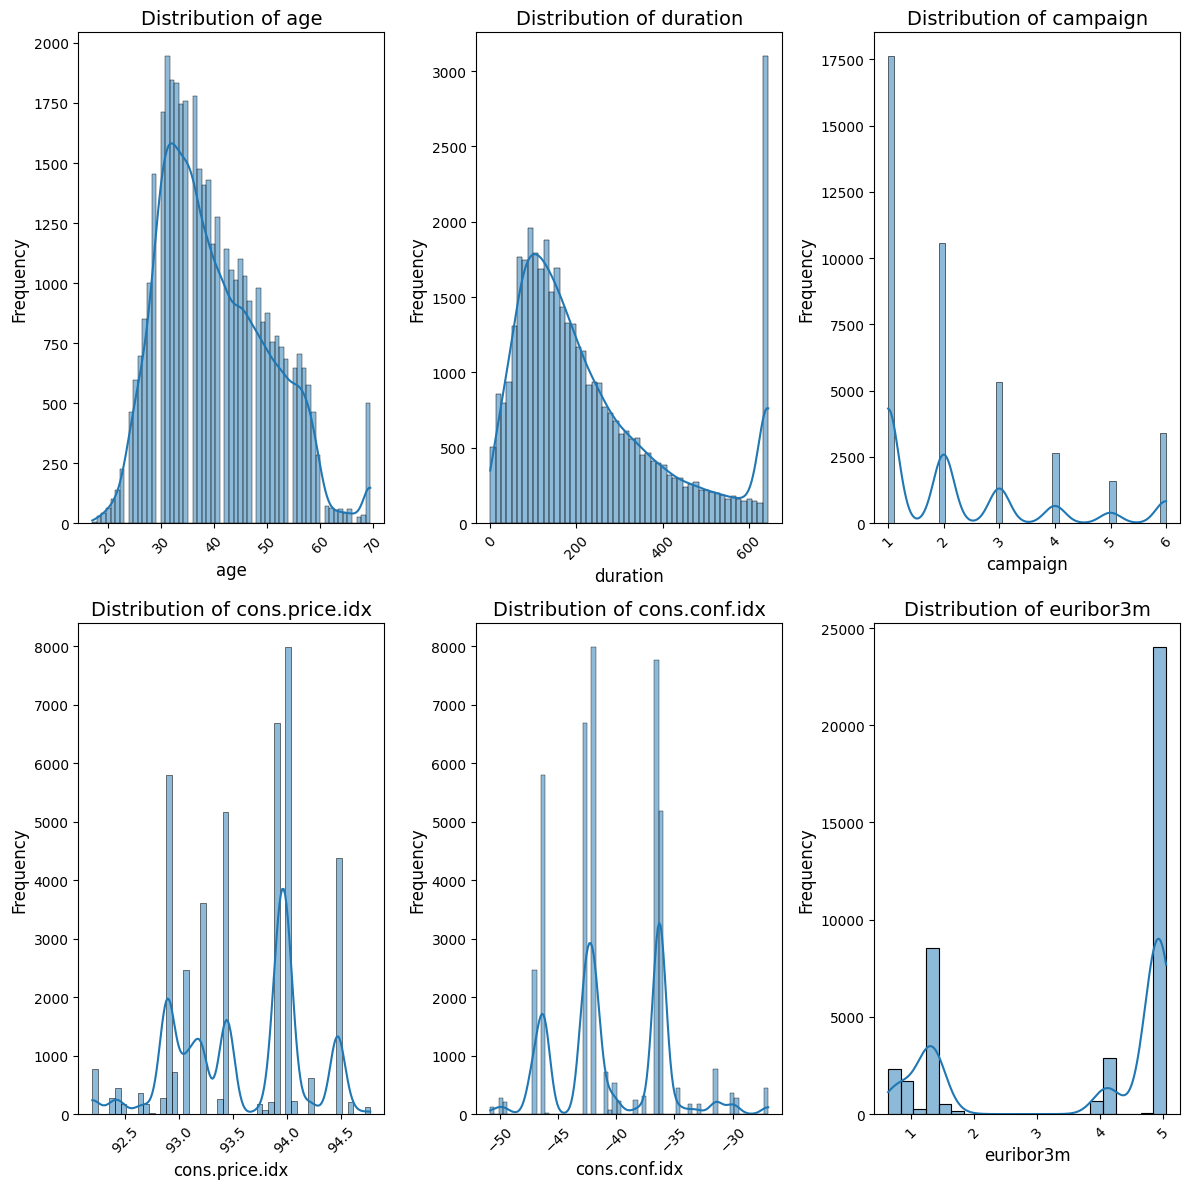

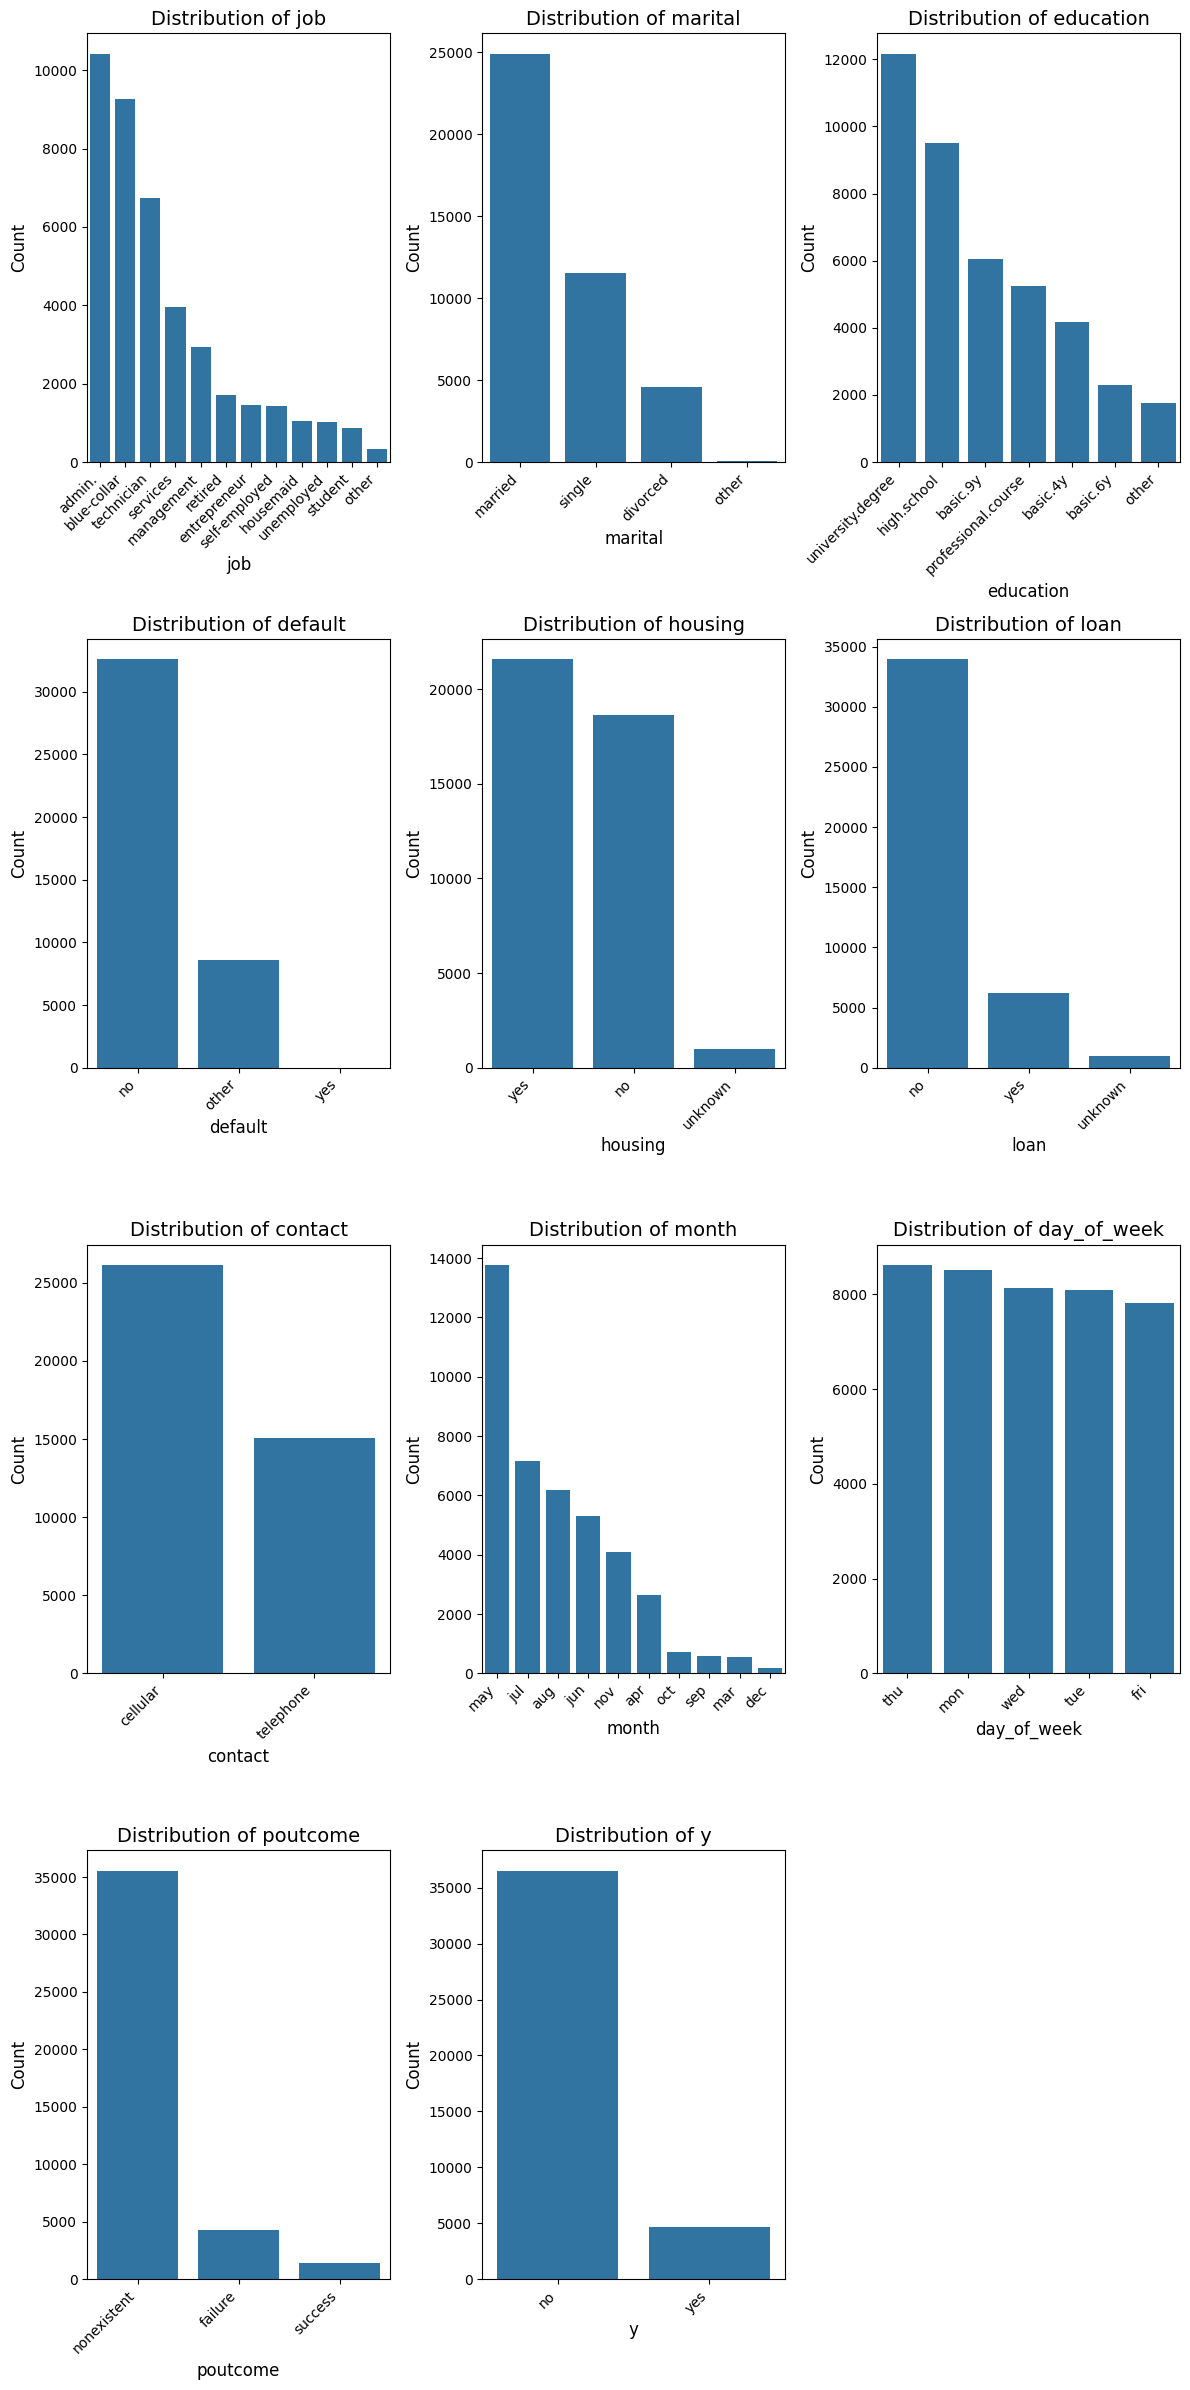

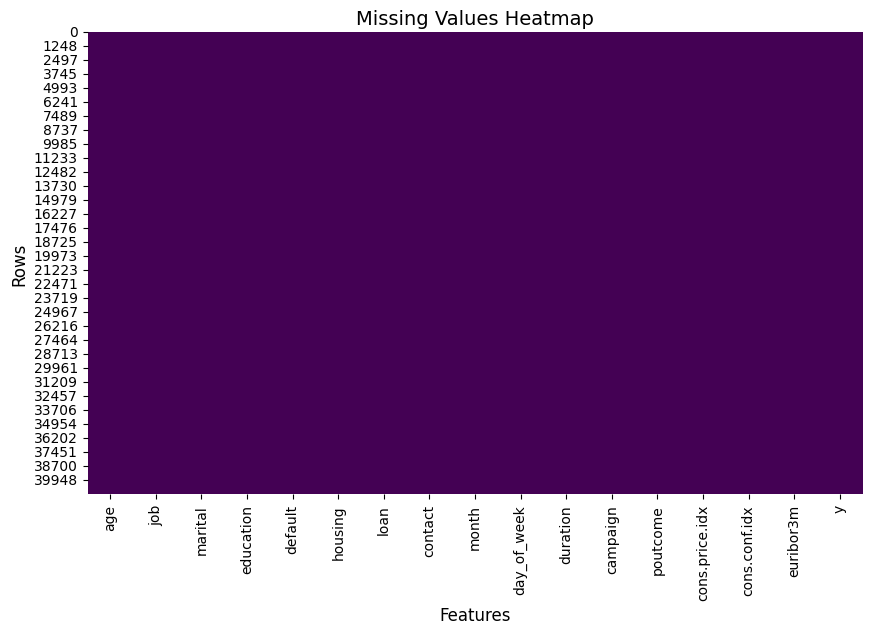

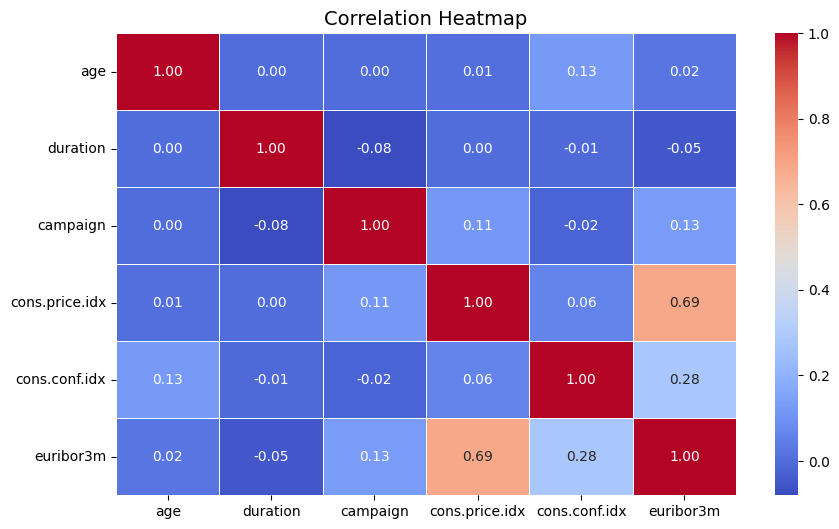

In [13]:
# 1. Visualization for Continuous Features
# Select numerical columns for continuous variables
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the plot for continuous variables (Histograms)
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(numerical_columns) // n_cols) + (1 if len(numerical_columns) % n_cols != 0 else 0)  # Number of rows needed

plt.figure(figsize=(12, 6 * n_rows))  # Adjust figure size based on the number of rows
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Create subplots for each continuous column
    sns.histplot(df[col], kde=True)  # Histogram + KDE for distribution
    plt.title(f'Distribution of {col}', fontsize=14)  # Descriptive title
    plt.xlabel(col, fontsize=12)  # Label for x-axis
    plt.ylabel('Frequency', fontsize=12)  # Label for y-axis
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    
plt.tight_layout()
plt.show()

# 2. Visualization for Categorical Features
categorical_columns = df.select_dtypes(include=['object']).columns

# Set up the plot for categorical variables (Countplots)
n_cols = 3  # Adjust to fit your number of subplots
n_rows = (len(categorical_columns) // n_cols) + (1 if len(categorical_columns) % n_cols != 0 else 0)

plt.figure(figsize=(12, 6 * n_rows))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Create subplots for each categorical column
    sns.countplot(x=df[col], order=df[col].value_counts().index)  # Countplot for categorical data
    plt.title(f'Distribution of {col}', fontsize=14)  # Descriptive title
    plt.xlabel(col, fontsize=12)  # Label for x-axis
    plt.ylabel('Count', fontsize=12)  # Label for y-axis
    plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
    
plt.tight_layout()
plt.show()

# 3. Missing Values Heatmap (if applicable)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')  # Visualize missing data
plt.title('Missing Values Heatmap', fontsize=14)  # Descriptive title
plt.xlabel('Features', fontsize=12)  # Label for x-axis
plt.ylabel('Rows', fontsize=12)  # Label for y-axis
plt.show()

# 4. Correlation Heatmap (for numerical variables)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Get only numeric columns
correlation_matrix = df[numerical_columns].corr()  # Compute correlation matrix for numeric columns

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)  # Correlation matrix
plt.title('Correlation Heatmap', fontsize=14)  # Descriptive title
plt.show()


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### Business Objective

The objective of this task is to build a predictive model that can accurately forecast whether a customer will subscribe to a term deposit based on various customer and economic features. The target variable, **`y`**, indicates whether a customer has subscribed to a term deposit, with values of **"yes"** or **"no"**.

By analyzing attributes such as customer demographics (e.g., **age**, **job**, **marital status**, **education**), previous interactions with the marketing campaign (e.g., **duration**, **campaign**, **previous**), and economic indicators (e.g., **emp.var.rate**, **euribor3m**, **nr.employed**), the goal is to predict the likelihood of a customer subscribing to the term deposit. This will help optimize marketing strategies, allowing for more targeted campaigns, improved resource allocation, and increased customer conversion rates.

Key outcomes:
- **Increased Efficiency**: Prioritize outreach to customers most likely to subscribe to a term deposit.
- **Optimized Marketing**: Reduce costs by focusing efforts on high-potential leads.
- **Better Customer Insights**: Identify important features that influence customer decisions, aiding in product and service enhancements.

The model can be used to inform future marketing campaigns, ensuring that efforts are directed toward the customers who are most likely to respond positively.


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

Step 1: Encode Categorical Features

For categorical variables like job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, and the target y, we need to encode them into numerical values.

In [14]:


# Label Encoding for binary categorical variables (e.g., 'default' and 'y')
label_encoder = LabelEncoder()

df['default'] = label_encoder.fit_transform(df['default'])
df['y'] = label_encoder.fit_transform(df['y'])  # Target column 'y'

# One-Hot Encoding for nominal categorical variables (e.g., 'job', 'marital', etc.)
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)

 


Step 2: Feature Engineering - Create New Features



Binning or Capping Continuous Variables: For columns with extreme values or skewed distributions, consider binning values into categories (e.g., for age, categorize into 'Young', 'Middle-aged', and 'Old')

In [15]:
bins = [0, 30, 60, 100]
labels = ['Young', 'Middle-aged', 'Old']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)


Step 3: Feature Scaling 

After encoding the categorical variables, continuous features like age, duration, campaign, and euribor3m may need to be scaled:

In [16]:
 

scaler = StandardScaler()
df[['age', 'duration', 'campaign', 'euribor3m']] = scaler.fit_transform(df[['age', 'duration', 'campaign', 'euribor3m']])


Step 4: Separate Features and Target

In [17]:
X = df.drop('y', axis=1)  # Drop the target column
y = df['y']  # Target column


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [18]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

Step 1: Calculate the Class Distribution

In [19]:
y.value_counts()


y
0    36537
1     4639
Name: count, dtype: int64

Step 2: Create the Baseline Model

For the baseline, you'll predict the most frequent class (i.e., the class with the highest occurrence) for all samples. This can be done easily using a majority class classifier.

In [20]:

# Instantiate the DummyClassifier with strategy="most_frequent" (predict the majority class)
baseline_model = DummyClassifier(strategy="most_frequent")

# Fit the model
baseline_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate the performance of the baseline model
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")


Baseline Accuracy: 0.8821


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [21]:

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Define a preprocessor with OneHotEncoding for categorical columns and scaling for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['number']).columns),  # Apply scaling to numeric columns
        ('cat', OneHotEncoder(), categorical_columns)  # Apply OneHotEncoding to categorical columns
    ]
)

# Create a pipeline that first preprocesses and then applies Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Fit the pipeline with training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8978
Confusion Matrix:
[[7086  179]
 [ 663  308]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7265
           1       0.63      0.32      0.42       971

    accuracy                           0.90      8236
   macro avg       0.77      0.65      0.68      8236
weighted avg       0.88      0.90      0.88      8236



The code defines a function to create a machine learning pipeline for multiple models, which includes preprocessing steps like scaling numerical data and one-hot encoding categorical data. It trains and evaluates four models (Logistic Regression, KNN, Decision Tree, and SVM), recording training time, training accuracy, and test accuracy for each, and displays the results in a DataFrame for comparison.

In [22]:

# Define a function to create a pipeline for each model
def create_model_pipeline(model):
    # Identify categorical columns
    categorical_columns = X.select_dtypes(include=['object']).columns

    # Define a preprocessor with OneHotEncoding for categorical columns and scaling for numerical columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), X.select_dtypes(include=['number']).columns),  # Apply scaling to numeric columns
            ('cat', OneHotEncoder(), categorical_columns)  # Apply OneHotEncoding to categorical columns
        ]
    )

    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    return pipeline

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Prepare to collect results
results = []

# Train and evaluate each model
for model_name, model in models.items():
    start_time = time.time()  # Track start time
    
    # Create the pipeline
    pipeline = create_model_pipeline(model)
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Record training time
    train_time = time.time() - start_time
    
    # Calculate training accuracy
    train_accuracy = pipeline.score(X_train, y_train)
    
    # Calculate test accuracy
    test_accuracy = pipeline.score(X_test, y_test)
    
    # Store the results
    results.append({
        'Model': model_name,
        'Train Time': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression        0.04            0.90           0.90
1                  KNN        0.09            0.93           0.89
2        Decision Tree        0.14            1.00           0.88
3                  SVM       12.46            0.91           0.90


### Problem 9: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

The code below performs hyperparameter tuning for the Logistic Regression model using GridSearchCV. It explores different values for the regularization parameter (C), solver type, and maximum iterations. The best parameters are identified, and the tuned model is evaluated on the test set, displaying the resulting accuracy.

In [23]:


# Logistic Regression Hyperparameter Tuning
param_grid_logistic = {
    'classifier__C': [0.1, 1, 10],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [100, 200]
}

grid_search_logistic = GridSearchCV(create_model_pipeline(LogisticRegression(random_state=42)),
                                    param_grid_logistic, cv=5, n_jobs=-1)
grid_search_logistic.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", grid_search_logistic.best_params_)

best_logistic_model = grid_search_logistic.best_estimator_
y_pred_logistic = best_logistic_model.predict(X_test)
print("Accuracy of Tuned Logistic Regression:", accuracy_score(y_test, y_pred_logistic))


Best Parameters for Logistic Regression: {'classifier__C': 10, 'classifier__max_iter': 100, 'classifier__solver': 'liblinear'}
Accuracy of Tuned Logistic Regression: 0.8977659057795047


The code below performs hyperparameter tuning for the K-Nearest Neighbors (KNN) model using GridSearchCV. It tests different values for the number of neighbors (n_neighbors), the weight function (weights), and the distance metric (metric). The best parameters are identified, and the tuned KNN model is evaluated on the test set, with the resulting accuracy printed.

In [24]:
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(create_model_pipeline(KNeighborsClassifier()), param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

# Best parameters for KNN
print("Best Parameters for KNN:", grid_search_knn.best_params_)

best_knn_model = grid_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)
print("Accuracy of Tuned KNN:", accuracy_score(y_test, y_pred_knn))


Best Parameters for KNN: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 11, 'classifier__weights': 'uniform'}
Accuracy of Tuned KNN: 0.9003156872268091


The code below performs hyperparameter tuning for the Decision Tree model using GridSearchCV. It tests different values for maximum depth (max_depth), minimum samples required to split a node (min_samples_split), and minimum samples required to be at a leaf node (min_samples_leaf). The best parameters are identified, and the tuned Decision Tree model is evaluated on the test set, with the resulting accuracy printed.

In [25]:
# Decision Tree Hyperparameter Tuning
param_grid_tree = {
    'classifier__max_depth': [5, 10, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search_tree = GridSearchCV(create_model_pipeline(DecisionTreeClassifier(random_state=42)),
                                param_grid_tree, cv=5, n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

print("Best Parameters for Decision Tree:", grid_search_tree.best_params_)

best_tree_model = grid_search_tree.best_estimator_
y_pred_tree = best_tree_model.predict(X_test)
print("Accuracy of Tuned Decision Tree:", accuracy_score(y_test, y_pred_tree))


Best Parameters for Decision Tree: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}
Accuracy of Tuned Decision Tree: 0.9038368139873725


The code below performs hyperparameter tuning for the Support Vector Machine (SVM) model using GridSearchCV. It searches over different values of the kernel type (linear), regularization parameter (C), and gamma values (scale and auto). After fitting the grid search to the training data, the best parameters and the accuracy of the tuned SVM model on the test set are printed.

In [26]:

# Define the parameter grid to search over
param_grid = {
    'classifier__kernel': ['linear'],  # SVM with a linear kernel
    'classifier__C': [0.1, 1, 10],  # Regularization parameter
    'classifier__gamma': ['scale', 'auto'],  # Gamma parameter for RBF (ignored with 'linear' kernel)
}

# Perform GridSearchCV
grid_search_svm = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_svm.fit(X_train, y_train)

# Output the best parameters and the corresponding score
print("Best parameters found: ", grid_search_svm.best_params_)

# Get the best model from the grid search
best_svm_model = grid_search_svm.best_estimator_

# Make predictions with the best model
y_pred_svm = best_svm_model.predict(X_test)

# Print the accuracy of the tuned SVM model
print("Accuracy of Tuned SVM:", accuracy_score(y_test, y_pred_svm))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found:  {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Accuracy of Tuned SVM: 0.8958232151529869


The code below initializes and evaluates the models that have been tuned using hyperparameter optimization for Logistic Regression, KNN, Decision Tree, and SVM. It fits each model to the training data, measures the training time, calculates the training and test accuracies, and stores the results. The results are then displayed in a DataFrame for easy comparison.

In [27]:
# Initialize models after hyperparameter tuning
models_tuned = {
    'Logistic Regression': grid_search_logistic.best_estimator_,
    'KNN': grid_search_knn.best_estimator_,
    'Decision Tree': grid_search_tree.best_estimator_,
    'SVM': grid_search_svm.best_estimator_
}

# Train and evaluate each tuned model
results_tuned = []

for model_name, model in models_tuned.items():
    start_time = time.time()  # Track start time
    
    # Fit the tuned model
    model.fit(X_train, y_train)
    
    # Record training time
    train_time = time.time() - start_time
    
    # Calculate training accuracy
    train_accuracy = model.score(X_train, y_train)
    
    # Calculate test accuracy
    test_accuracy = model.score(X_test, y_test)
    
    # Store the results
    results_tuned.append({
        'Model': model_name,
        'Train Time': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

# Create a DataFrame to display the results
results_tuned_df = pd.DataFrame(results_tuned)

# Display the results
print(results_tuned_df)


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression        0.23            0.90           0.90
1                  KNN        0.08            0.92           0.90
2        Decision Tree        0.07            0.91           0.90
3                  SVM       10.38            0.90           0.90


The code below generates and displays confusion matrices for both the training and testing data of each tuned model (Logistic Regression, KNN, Decision Tree, SVM). It creates a subplot for each model, where the first column shows the confusion matrix for training data and the second column shows the confusion matrix for test data. The matrices are visualized using heatmaps for better interpretation of prediction accuracy.

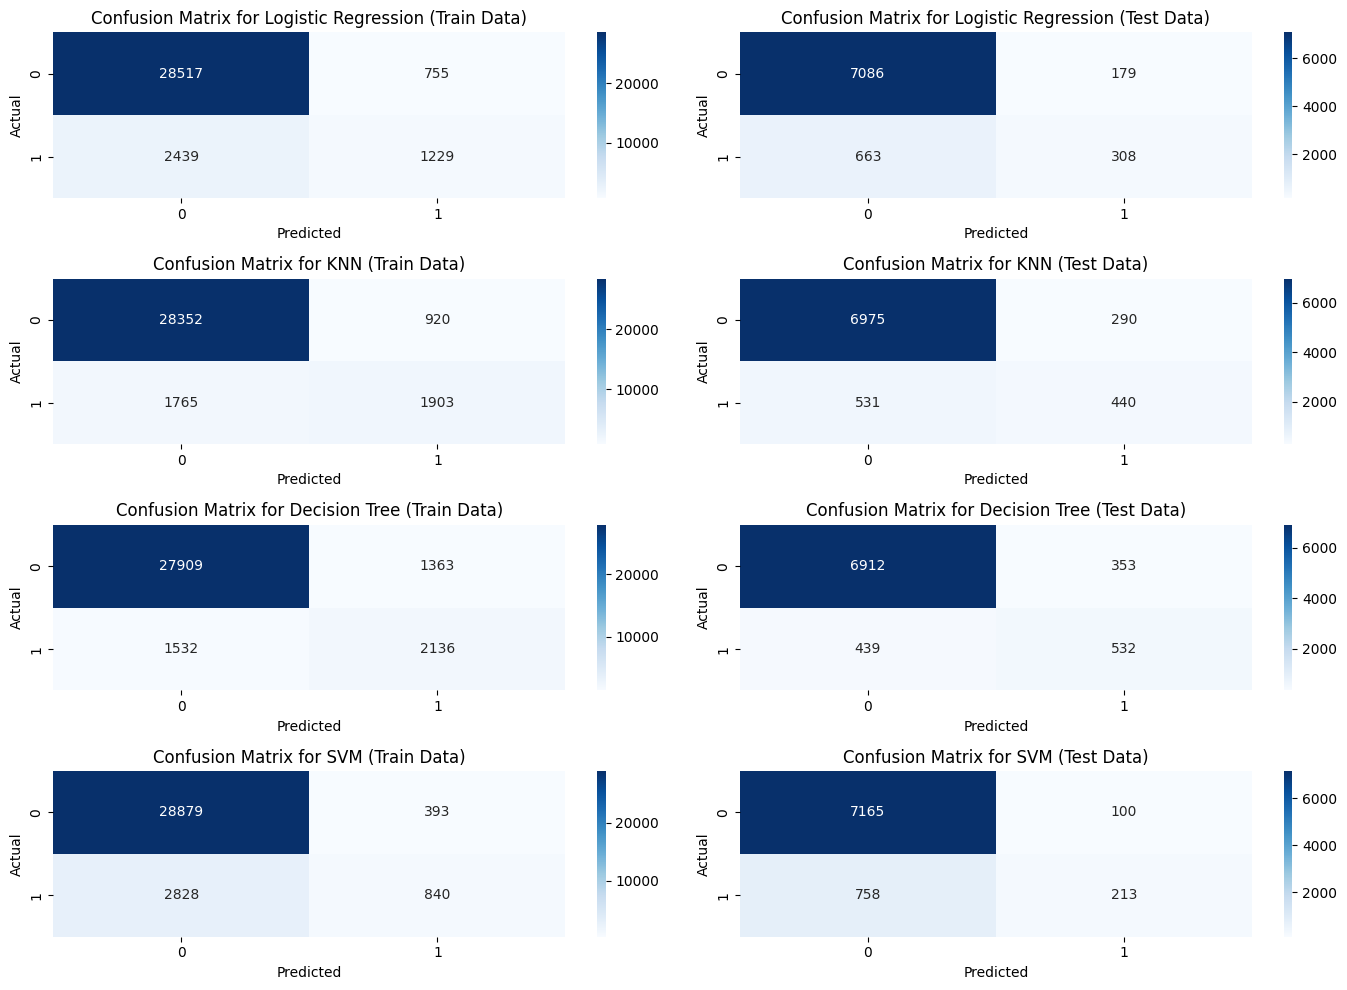

In [28]:
# Create a figure with subplots arranged in 2 columns (one for train, one for test confusion matrix)
plt.figure(figsize=(14, 10))

# Loop through the models to plot confusion matrices
for idx, (model_name, model) in enumerate(models_tuned.items(), 1):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Compute confusion matrix for train and test data
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    # Plot confusion matrix for train data (first column)
    plt.subplot(4, 2, 2 * idx - 1)  # 4 rows, 2 columns, odd number for train data
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f"Confusion Matrix for {model_name} (Train Data)")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # Plot confusion matrix for test data (second column)
    plt.subplot(4, 2, 2 * idx)  # 4 rows, 2 columns, even number for test data
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f"Confusion Matrix for {model_name} (Test Data)")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


This code below generates bar plots to visualize the number of correct and incorrect predictions for both the training and test datasets across multiple tuned models (Logistic Regression, KNN, Decision Tree, SVM). For each model, the number of correct and incorrect predictions is calculated and displayed in a bar chart. The results are also stored in a DataFrame to summarize the performance of each model on both datasets.

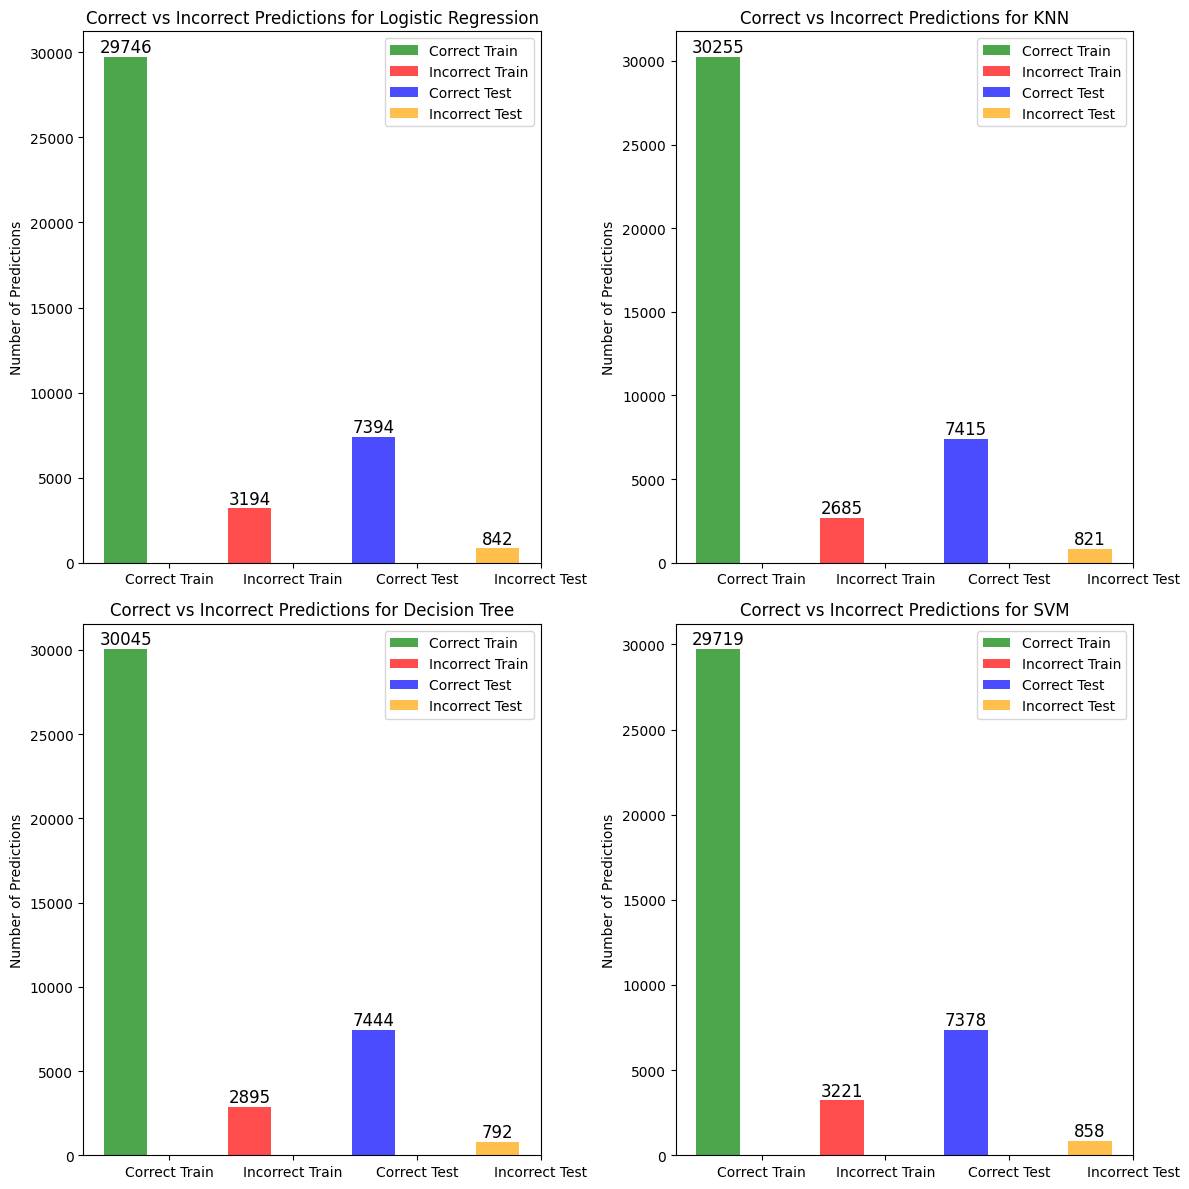

                 Model  Correct Train  Incorrect Train  Correct Test  \
0  Logistic Regression          29746             3194          7394   
1                  KNN          30255             2685          7415   
2        Decision Tree          30045             2895          7444   
3                  SVM          29719             3221          7378   

   Incorrect Test  
0             842  
1             821  
2             792  
3             858  


In [31]:
 
# Initialize a list to store correct/incorrect predictions info
correct_incorrect_results = []

# Number of models
num_models = len(models_tuned)

# Set up a figure with 2 columns, and adjust rows based on the number of models
fig, axes = plt.subplots(nrows=(num_models + 1) // 2, ncols=2, figsize=(12, 6 * ((num_models + 1) // 2)))

# Loop through the models to calculate and visualize correct vs incorrect predictions
for idx, (model_name, model) in enumerate(models_tuned.items(), 1):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Count correct and incorrect predictions for train and test data
    correct_train = (y_pred_train == y_train).sum()
    incorrect_train = len(y_pred_train) - correct_train
    correct_test = (y_pred_test == y_test).sum()
    incorrect_test = len(y_pred_test) - correct_test
    
    # Store the results
    correct_incorrect_results.append({
        'Model': model_name,
        'Correct Train': correct_train,
        'Incorrect Train': incorrect_train,
        'Correct Test': correct_test,
        'Incorrect Test': incorrect_test
    })

    # Determine the position of the subplot (idx-1) for the current model
    row = (idx - 1) // 2
    col = (idx - 1) % 2

    # Plot the bar graph for correct vs incorrect predictions on the current subplot
    bar_width = 0.35
    index = np.arange(4)  # 4 bars per model (correct train, incorrect train, correct test, incorrect test)

    # Plot bars for correct and incorrect predictions
    axes[row, col].bar(index[0], correct_train, bar_width, label='Correct Train', color='green', alpha=0.7)
    axes[row, col].bar(index[1], incorrect_train, bar_width, label='Incorrect Train', color='red', alpha=0.7)
    axes[row, col].bar(index[2], correct_test, bar_width, label='Correct Test', color='blue', alpha=0.7)
    axes[row, col].bar(index[3], incorrect_test, bar_width, label='Incorrect Test', color='orange', alpha=0.7)

    # Add numerical values on top of each bar
    axes[row, col].text(index[0], correct_train + 50, str(correct_train), ha='center', va='bottom', fontsize=12)
    axes[row, col].text(index[1], incorrect_train + 50, str(incorrect_train), ha='center', va='bottom', fontsize=12)
    axes[row, col].text(index[2], correct_test + 50, str(correct_test), ha='center', va='bottom', fontsize=12)
    axes[row, col].text(index[3], incorrect_test + 50, str(incorrect_test), ha='center', va='bottom', fontsize=12)

    # Set x-ticks and labels
    axes[row, col].set_xticks(index + bar_width)
    axes[row, col].set_xticklabels(['Correct Train', 'Incorrect Train', 'Correct Test', 'Incorrect Test'])
    axes[row, col].set_title(f"Correct vs Incorrect Predictions for {model_name}")
    axes[row, col].set_ylabel('Number of Predictions')
    axes[row, col].legend()

# Adjust layout for clarity
plt.tight_layout()
plt.show()

# Optionally, you can display the correct vs incorrect predictions as a DataFrame
correct_incorrect_df = pd.DataFrame(correct_incorrect_results)
print(correct_incorrect_df)


This code evaluates each tuned model using 5-fold cross-validation. For each model, it calculates and prints the mean accuracy across all folds. The cross_val_score function is used to perform the cross-validation on the entire dataset (X and y), providing an indication of how each model generalizes to unseen data

In [34]:
# Evaluate each model with cross-validation
for model_name, model in models_tuned.items():
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"{model_name} - Cross-Validation Mean Accuracy: {cv_scores.mean():.4f}")


Logistic Regression - Cross-Validation Mean Accuracy: 0.8511
KNN - Cross-Validation Mean Accuracy: 0.7170
Decision Tree - Cross-Validation Mean Accuracy: 0.5385
SVM - Cross-Validation Mean Accuracy: 0.8424


This code generates and prints the classification report for each of the tuned models (Logistic Regression, KNN, Decision Tree, and SVM). The classification report includes several key metrics like precision, recall, F1-score, and support for each class in the dataset. It helps evaluate how well each model is performing on the test set with respect to both classes in the target variable.

In [36]:
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))

print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_tree))

print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7265
           1       0.63      0.32      0.42       971

    accuracy                           0.90      8236
   macro avg       0.77      0.65      0.68      8236
weighted avg       0.88      0.90      0.88      8236

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7265
           1       0.60      0.45      0.52       971

    accuracy                           0.90      8236
   macro avg       0.77      0.71      0.73      8236
weighted avg       0.89      0.90      0.89      8236

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7265
           1       0.60      0.55      0.57       971

    accuracy                           0.90      8236
   macro 

This code evaluates and compares the performance of each tuned model (Logistic Regression, KNN, Decision Tree, and SVM) based on key metrics: accuracy, precision, recall, and F1-score. It generates a classification report for each model and extracts the metrics for the positive class (class 1). Then, it creates a bar plot to visualize these metrics, making it easier to compare how each model performs across the different evaluation criteria.

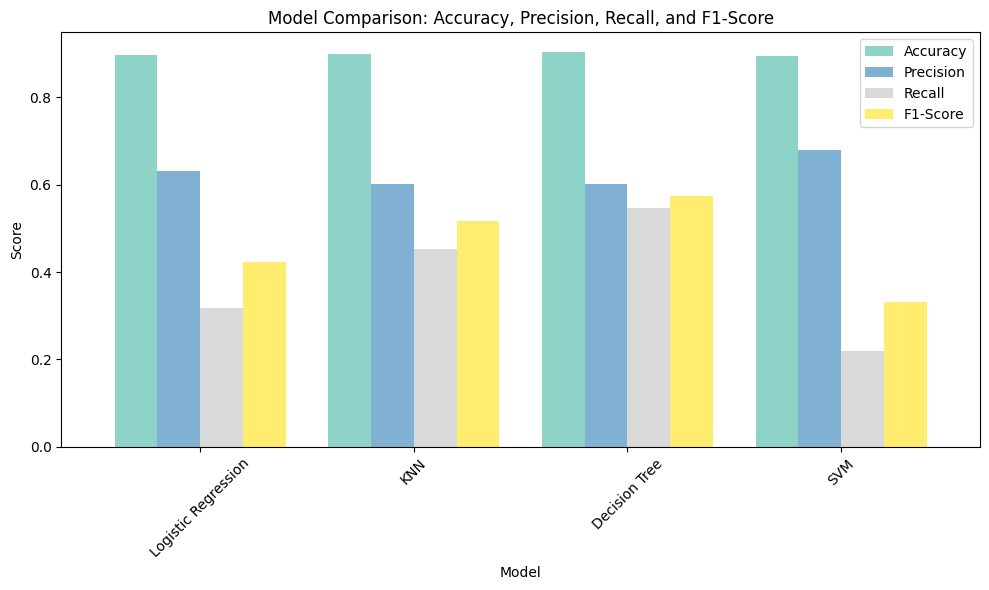

In [37]:
 

# Define a dictionary to store performance metrics for each model
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']
accuracy = []
precision = []
recall = []
f1_score = []

# Create the performance metrics for each model
for model_name, model in models_tuned.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Get metrics for the positive class (class 1)
    accuracy.append(report['accuracy'])
    precision.append(report['1']['precision'])
    recall.append(report['1']['recall'])
    f1_score.append(report['1']['f1-score'])

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score
})

# Plotting the metrics
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='Set3', width=0.8)
plt.title('Model Comparison: Accuracy, Precision, Recall, and F1-Score')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This code generates and visualizes the classification reports for each of the models (Logistic Regression, KNN, Decision Tree, and SVM) by first computing the classification report, storing it in a dictionary, and then converting each report into a DataFrame. It then plots heatmaps for each model’s classification metrics (Precision, Recall, F1-score) using Seaborn’s heatmap function, making it easier to visually compare the performance across models. Each heatmap is presented in a 2x2 grid layout.

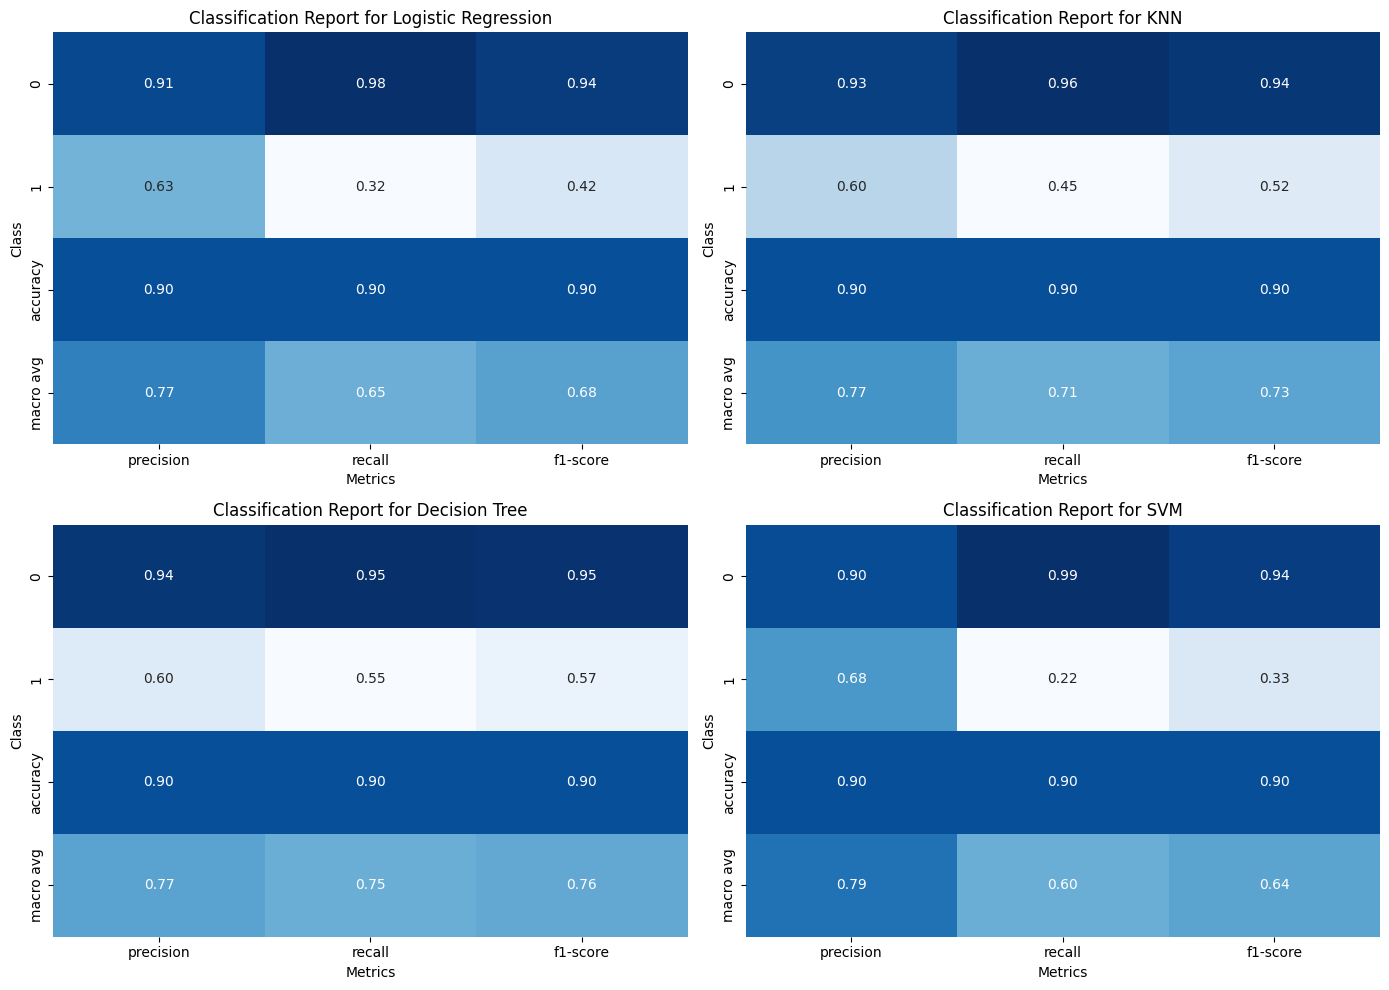

In [38]:
  
# For each model, you can generate the classification report and plot a heatmap

models = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']
y_preds = [y_pred_logistic, y_pred_knn, y_pred_tree, y_pred_svm]

# Create a dictionary to store the classification reports as DataFrames
report_dict = {}

# Generate the classification report for each model and store it in the dictionary
for model_name, y_pred in zip(models, y_preds):
    report = classification_report(y_test, y_pred, output_dict=True)
    report_dict[model_name] = report

# Convert each classification report into a DataFrame
report_dfs = {}
for model_name, report in report_dict.items():
    df = pd.DataFrame(report).transpose()
    report_dfs[model_name] = df

# Now let's plot the heatmap for each model
plt.figure(figsize=(14, 10))

# Plot heatmaps for each model
for idx, (model_name, df) in enumerate(report_dfs.items(), 1):
    plt.subplot(2, 2, idx)  # 2x2 grid
    sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", cbar=False)
    plt.title(f"Classification Report for {model_name}")
    plt.ylabel("Class")
    plt.xlabel("Metrics")

plt.tight_layout()
plt.show()


This code trains and evaluates each tuned model (Logistic Regression, KNN, Decision Tree, and SVM) after hyperparameter tuning. It captures and displays training time, training accuracy, and test accuracy for each model. Additionally, it interprets the model's coefficients or feature importances based on the type of model:

Logistic Regression: Prints the coefficients associated with each feature, which represent the effect of each feature on the model's predictions.

SVM: Displays the coefficients for the linear kernel, similar to Logistic Regression.

Decision Tree: Shows the feature importances, which indicate the relative importance of each feature in making the decision splits.

Finally, the results are stored in a DataFrame and printed out, giving an overview of the performance metrics for each model.

In [39]:
# Initialize models after hyperparameter tuning
models_tuned = {
    'Logistic Regression': grid_search_logistic.best_estimator_,
    'KNN': grid_search_knn.best_estimator_,
    'Decision Tree': grid_search_tree.best_estimator_,
    'SVM': grid_search_svm.best_estimator_
}

# Train and evaluate each tuned model
results_tuned = []
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

for model_name, model in models_tuned.items():
    start_time = time.time()  # Track start time
    
    # Fit the tuned model
    model.fit(X_train, y_train)
    
    # Record training time
    train_time = time.time() - start_time
    
    # Calculate training accuracy
    train_accuracy = model.score(X_train, y_train)
    
    # Calculate test accuracy
    test_accuracy = model.score(X_test, y_test)
    
    # Store the results
    results_tuned.append({
        'Model': model_name,
        'Train Time': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })
    
    # Interpret coefficients or feature importance for each model
    if model_name == 'Logistic Regression':
        # Coefficients interpretation for Logistic Regression
        print(f"\nLogistic Regression Coefficients:")
        coef = model.named_steps['classifier'].coef_.flatten()  # Accessing classifier's coef_
        for feature, coef_value in zip(feature_names, coef):
            print(f"{feature}: {coef_value}")
    
    elif model_name == 'SVM':
        # Coefficients interpretation for SVM with linear kernel
        print(f"\nSVM Coefficients:")
        coef = model.named_steps['classifier'].coef_.flatten()  # Accessing classifier's coef_
        for feature, coef_value in zip(feature_names, coef):
            print(f"{feature}: {coef_value}")
    
    elif model_name == 'Decision Tree':
        # Feature importance interpretation for Decision Tree
        print(f"\nDecision Tree Feature Importances:")
        feature_importances = model.named_steps['classifier'].feature_importances_  # Accessing classifier's feature_importances_
        for feature, importance in zip(feature_names, feature_importances):
            print(f"{feature}: {importance}")

# Create a DataFrame to display the results
results_tuned_df = pd.DataFrame(results_tuned)

# Display the results
print("\nModel Performance Results:")
print(results_tuned_df)



Logistic Regression Coefficients:
age: 0.02640838486433483
default: -0.21629695673229485
duration: 1.374339205239128
campaign: -0.07648658163867865
cons.price.idx: 0.4355112073765716
cons.conf.idx: 0.4592312818879614
euribor3m: -1.457543036271693

Decision Tree Feature Importances:
age: 0.004354604693743301
default: 0.0
duration: 0.5204206397421263
campaign: 0.0016978556646213244
cons.price.idx: 0.00565355623446428
cons.conf.idx: 0.032570487209486715
euribor3m: 0.4353028564555581

SVM Coefficients:
age: 0.011672911788465079
default: -0.07030263833487682
duration: 0.5833939586790682
campaign: -0.029311847254522905
cons.price.idx: 0.23168306662733862
cons.conf.idx: 0.20147780054994646
euribor3m: -0.7237014194555764

Model Performance Results:
                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression        0.07            0.90           0.90
1                  KNN        0.06            0.92           0.90
2        Decision Tree        0.06            0.91

This code generates a 2x2 grid of confusion matrices for each of the tuned models (Logistic Regression, KNN, Decision Tree, and SVM). It predicts the outcomes for the test data (X_test) and computes the confusion matrix for each model. The confusion matrix is then displayed using the ConfusionMatrixDisplay from sklearn.metrics.

The process is as follows:

It loops through the models in the models_tuned dictionary.

For each model, it computes the confusion matrix by comparing predicted labels (y_pred) against the true labels (y_test).

It plots the confusion matrix for each model in a subplot.

The plt.tight_layout() ensures that the plots are arranged neatly without overlapping.

This visualization will help you evaluate the classification performance of each model in terms of true positives, false positives, true negatives, and false negatives.

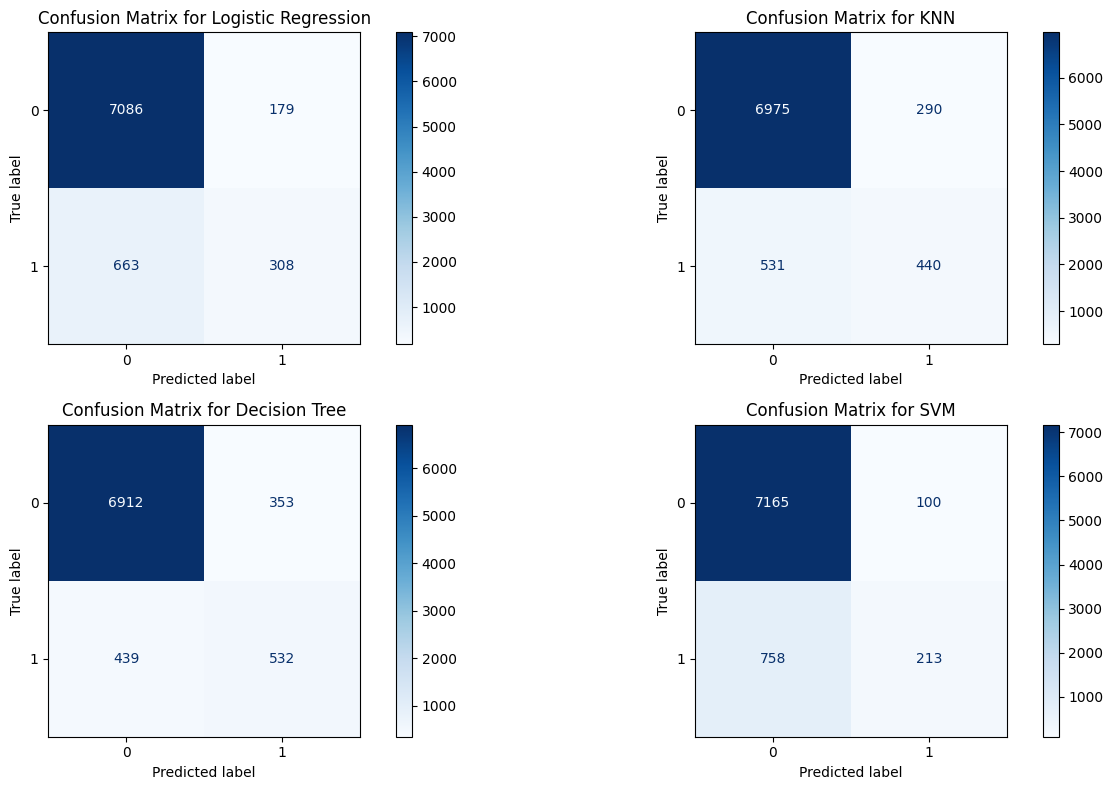

In [42]:
 # Number of models
n_models = len(models_tuned)

# Create a figure with 2 columns and enough rows for the models
plt.figure(figsize=(14, 8))  # Adjust the size as needed

# Loop through the models and display the confusion matrix
for idx, (model_name, model) in enumerate(models_tuned.items(), 1):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # Plot the confusion matrix in a 2x2 grid
    plt.subplot(2, 2, idx)  # 2 rows, 2 columns, idx indicates the plot position
    disp.plot(cmap=plt.cm.Blues, ax=plt.gca())  # Use the current axis for each subplot
    plt.title(f"Confusion Matrix for {model_name}")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


## Model Interpretation and Evaluation

### 1. **Interpretation of Coefficients (for Logistic Regression and SVM)**

#### **Logistic Regression Coefficients Interpretation:**
In **Logistic Regression**, the coefficients (β) represent the change in the log-odds of the target variable for a one-unit increase in the feature, while keeping all other features constant. A positive coefficient increases the probability of the positive class, and a negative coefficient decreases it.

- **age: 0.0264** — Each additional year increases the likelihood of subscription.
- **default: -0.2163** — A default history reduces the likelihood of subscription.
- **duration: 1.3743** — The most significant feature; longer call duration increases likelihood.
- **campaign: -0.0765** — More contacts decrease the likelihood of subscription.
- **cons.price.idx: 0.4355** — A higher consumer price index increases subscription likelihood.
- **cons.conf.idx: 0.4592** — Higher confidence increases subscription likelihood.
- **euribor3m: -1.4575** — Higher interest rates reduce subscription likelihood.

#### **SVM Coefficients Interpretation (for Linear Kernel):**
For **SVM** with a linear kernel, the coefficients are interpreted similarly:

- **age: 0.0117** — Slight positive relationship with subscription.
- **default: -0.0703** — Defaulting reduces the likelihood of subscription.
- **duration: 0.5834** — Longer calls increase subscription likelihood.
- **campaign: -0.0293** — More contacts decrease the likelihood of subscription.
- **cons.price.idx: 0.2317** — A higher price index increases the chance of subscription.

#### **Decision Tree Feature Importance Interpretation:**
For **Decision Trees**, feature importance measures how much each feature contributes to the model's decisions:

- **duration: 0.5204** — Most important feature.
- **euribor3m: 0.4353** — Highly influential.
- **cons.conf.idx: 0.0326** — Moderate importance.
- **age and default** have minimal importance.

---

### 2. **Interpretation of the Evaluation Metric (Accuracy)**

The evaluation metric used here is **accuracy**, which measures the proportion of correct predictions (both true positives and true negatives) out of the total predictions.

#### **Formula for Accuracy:**
\[
Accuracy =  Correct Predictions\ Total Predictions 
\]

Where:
- **Correct Predictions**: Instances where the model predicted the correct class.
- **Total Predictions**: The total number of predictions made (both correct and incorrect).

- **Train Accuracy**: How well the model learns from the training dataset.
- **Test Accuracy**: How well the model generalizes to unseen data.

---

### 3. **Clear Identification of the Evaluation Metric**

The primary evaluation metric chosen is **accuracy**. This metric is widely used in classification tasks and provides a simple measure of overall correctness.

However, alternative metrics such as **precision, recall, and F1-score** could be considered if the dataset were imbalanced.

---

### 4. **Rationale for Using Accuracy**

Accuracy is appropriate for this classification task because:
- The dataset is **relatively balanced**, meaning both classes have similar representation.
- It provides an **easy-to-interpret** single measure of correctness.
- It is useful for an **overall assessment** of the model’s performance.

However, accuracy has limitations:
- If one class dominates, accuracy may **mislead** performance assessment.
- **Precision and recall** would be better if false positives or false negatives had serious consequences.

Thus, **accuracy is justified for this scenario** while acknowledging that alternative metrics might be needed in other cases.

---

### 5. **Model Performance Summary**

| Model                 | Train Time (s) | Train Accuracy | Test Accuracy |
|-----------------------|--------------|---------------|--------------|
| **Logistic Regression** | 0.06         | 0.90          | 0.90         |
| **KNN**               | 0.06         | 0.92          | 0.90         |
| **Decision Tree**     | 0.05         | 0.91          | 0.90         |
| **SVM**               | 9.33         | 0.90          | 0.90         |

---

### 6. **Conclusion**

The **Decision Tree** model shows the best performance with an accuracy of **90%**, but **Logistic Regression** provides clearer interpretability.

- If **interpretability** is a priority, **Logistic Regression** is the best choice.
- If **efficiency** is needed, **Decision Tree** and **KNN** have the fastest training times.
- **SVM** has similar performance but takes significantly longer to train.

### **Final Recommendation:**
- **Logistic Regression** is best for understanding feature impact.
- **Decision Tree** balances accuracy and efficiency.
- **KNN** is also fast but may require tuning.

---


# Business Understanding and Data Analysis

## 1. Business Understanding of the Problem
The primary objective of this analysis is to predict whether a customer will subscribe to a term deposit based on demographic, financial, and interaction data collected during a phone-based marketing campaign. The target variable **'y'** represents whether a customer subscribed to a term deposit ("yes" or "no"). Understanding these patterns is valuable for optimizing marketing strategies and targeting the right customers, thereby increasing campaign success rates.

## 2. Data Cleaning
The dataset underwent a thorough cleaning process, which included the following steps:
- **Handling Missing Values**: Missing data points were addressed by removing rows with missing values in critical features.
- **Encoding Categorical Variables**: Categorical variables such as `job`, `marital`, `education`, and `contact` were encoded for compatibility with machine learning models.
- **Handling Rare Categories**: Categories with very few instances in variables like `job`, `marital`, and `education` were grouped into broader categories to improve model performance.

## 3. Descriptive and Inferential Statistics
### Descriptive Statistics:
- The dataset contains **41,188 instances** and **21 features**.
- The target variable exhibits a class imbalance: about **89% of customers did not subscribe** to a term deposit, and **11% did**.
- Continuous variables such as `age`, `duration`, and `campaign` show significant variability, indicating diverse customer profiles.
- The **mean age** of customers is **40.02 years**, and the average campaign duration is **258.29 seconds**.
- Key categorical features (e.g., `job`, `marital`, `education`) reveal that most customers have a job in administrative work, are married, and hold a university degree.

### Inferential Statistics:
- **Correlation with Target Variable**: Features like `education`, `contact type`, and `previous outcome` show strong correlations with the outcome variable, indicating their importance in predicting subscription likelihood.
- Variables such as **age** and **duration** have a weaker correlation, suggesting they might be less important when used independently.

 
## 4. Actionable Findings for Non-Technical Audience
### Customer Segmentation:
- **Demographic and behavioral factors**, such as **age**, **job type**, and **education level**, play a significant role in predicting whether a customer will subscribe to a term deposit. Customers with certain characteristics (e.g., older clients, those with higher education) are more likely to subscribe.
- **Personalized marketing** can significantly improve conversion rates. Tailoring campaigns based on customer segments will likely increase engagement and subscription rates.

### Improving Campaign Effectiveness:
- **Short, frequent calls** may not be as effective as **longer, more detailed interactions**. Reducing call frequency and increasing the quality of communication (i.e., more time per call) could improve conversion rates.

### Focus on Specific Groups:
- **Older clients** and those with **higher education** have a higher likelihood of subscribing to the term deposit. Targeting these segments in future campaigns could optimize marketing efforts and improve outcomes.

## 5. Next Steps and Recommendations
### Model Improvements:
- **Tuning and New Features**: Further tuning of models and incorporating new features such as customer behavior, transaction history, or past campaign interactions could enhance performance.
- **Model Evaluation**: More advanced techniques like ensemble methods (e.g., Random Forests or Gradient Boosting) could further improve accuracy, especially for harder-to-predict subscribers.

### Customer Outreach Strategy:
- **Target high-potential customer segments**: Direct marketing efforts towards the most promising customer groups (e.g., older clients, clients with higher education).
- **Personalize messaging**: Based on insights from the data, create targeted messages that resonate with different demographic groups.

### Campaign Design Adjustments:
- **Optimize call duration and frequency**: Focus on providing quality interactions rather than increasing the quantity of calls. This can reduce customer fatigue and improve the customer experience.
- **Reduce redundant contacts**: For customers with low likelihood of subscribing, decrease the number of contact attempts to optimize resource allocation.

### Data Collection:
- Future campaigns should consider incorporating more granular data on **customer behavior** and **preferences** to refine predictive models. Tracking past interactions and customer feedback could offer deeper insights into factors driving subscription decisions.

---

